In [1]:
from pandas.plotting import scatter_matrix
import pandas as pd

In [2]:
train_data = pd.read_csv(r"titanic/train.csv")
test_data = pd.read_csv(r"titanic/test.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In <b>train_data</b>  sind nur 714 <b>"Age"</b> und 204 <b>"Cabin"</b> angegeben, für 891 Reisenden.

In [4]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
temp_train = test_data.copy()

## Age

In [6]:
print("Missing in the train data, column 'Age': ", end=" ")
print(temp_train.Age.isnull().sum())

Missing in the train data, column 'Age':  86


In [7]:
temp_train["Sex"].unique()

array(['male', 'female'], dtype=object)

In [8]:
temp_train.groupby(["Pclass", "Sex"])["Age"].mean()

Pclass  Sex   
1       female    41.333333
        male      40.520000
2       female    24.376552
        male      30.940678
3       female    23.073400
        male      24.525104
Name: Age, dtype: float64

In [9]:
temp_train["Age"] = temp_train.groupby(["Pclass", "Sex"])["Age"].apply(lambda a: a.fillna(a.mean()))
temp_train["Age"].isnull().sum()

0

In [10]:
display(len(train_data[train_data.Cabin.notna()]))
train_data[train_data.Cabin.notna()][:10]

204

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


In [11]:
temp_train['first_Cabin_Letter']=temp_train['Cabin'].str.extract("([a-zA-Z]+)")
temp_train['first_Cabin_Letter'] = temp_train['first_Cabin_Letter'].fillna(0)

temp_train[:5]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,first_Cabin_Letter
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [12]:
df_all = pd.concat([train_data, test_data], sort=True).reset_index(drop=True)
dfs = [train_data, test_data]

In [13]:
print("Missings in the train_data")
display(train_data.isnull().sum())


Missings in the train_data


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
print("Missings in the test_data")
display(test_data.isnull().sum())

Missings in the test_data


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

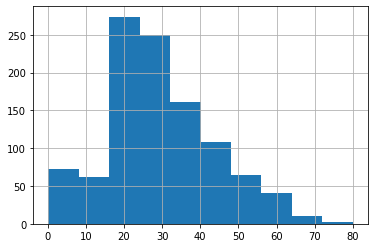

In [15]:
df_all.Age.hist()

In [16]:
df_all.groupby(["Pclass", "Sex"]).Age.median()

Pclass  Sex   
1       female    36.0
        male      42.0
2       female    28.0
        male      29.5
3       female    22.0
        male      25.0
Name: Age, dtype: float64

In [17]:
df_all.groupby(["Pclass", "Sex"]).Age.mean()

Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#sns.set_style('whitegrid')


AttributeError: 'DataFrame' object has no attribute 'Survived'

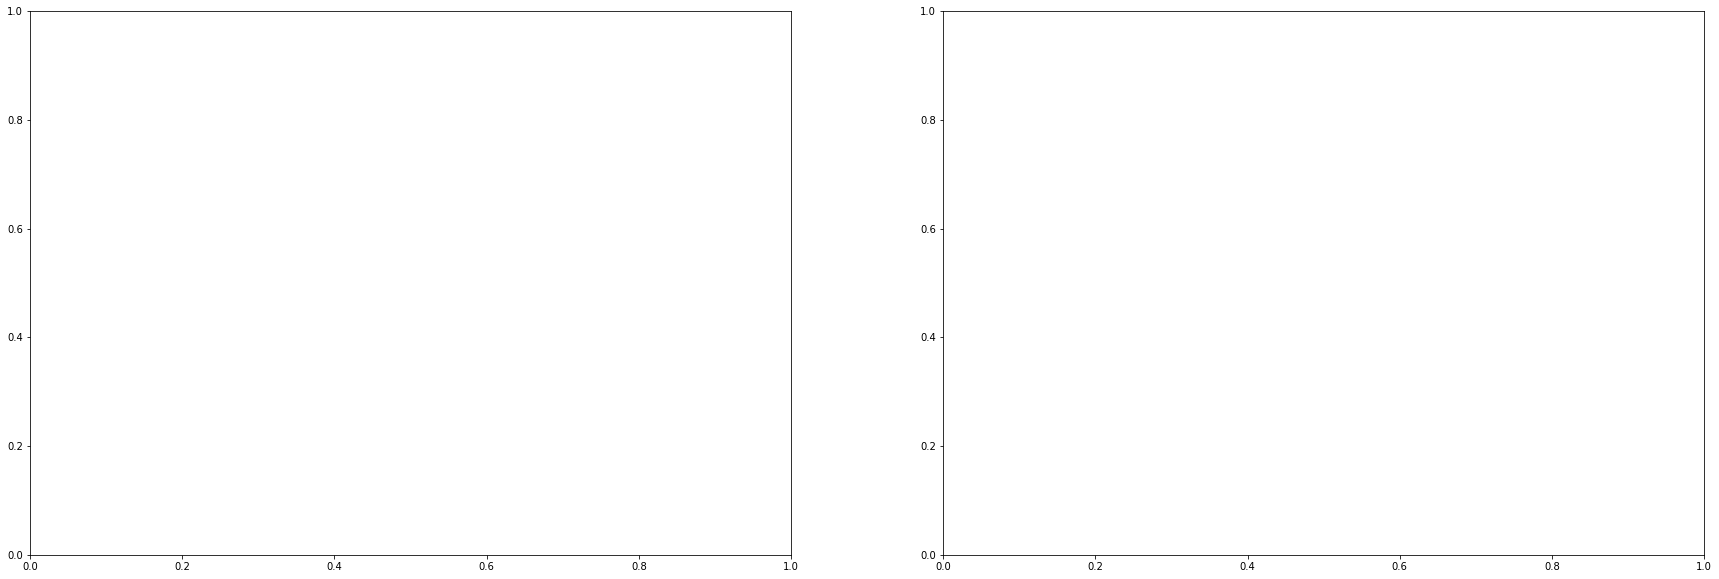

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
woman = temp_train[temp_train.Sex == "female"]
man = temp_train[temp_train.Sex == "male"]
survived = "survived"
not_survived = "not survived"
#display(len(woman[woman.Survived == 1].Age))
#display(len(woman[woman.Survived == 1].Age.dropna()))
ax = sns.histplot(woman[woman.Survived == 1].Age.dropna(), bins = 30, label = survived, ax = ax1, kde=False, color="green", alpha=0.4)
ax = sns.histplot(woman[woman.Survived == 0].Age.dropna(), label = not_survived, bins=30, ax = ax1, kde=False, color="blue" ,alpha=0.3)
ax.legend()
ax = sns.histplot(man[man.Survived == 1].Age.dropna(), bins = 30, label = survived, ax = ax2, kde=False, color="green", alpha=0.7)
ax = sns.histplot(man[man.Survived == 0].Age.dropna(), label = not_survived, bins=30, ax = ax2, kde=False, color="blue", alpha=0.3)
ax.legend()

In [ ]:
sns.countplot(data=train_data[train_data["Sex"]=="male"], x="Age", bins=30)

In [ ]:
#scatter_matrix(train_data[["Fare", "Survived"]][train_data["Fare"] < 100])

In [ ]:
sns.relplot(data=train_data, x="Fare", y="Survived")

In [ ]:
sns.violinplot(data=train_data[train_data["Fare"] < 200], y="Fare", x="Survived")

In [ ]:
sns.violinplot(data=train_data[train_data["Fare"] < 200], y="SibSp", x="Survived")

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
display(tips)
ax = sns.violinplot(x=tips["total_bill"])